In [69]:
import torch
from torch.nn import Parameter
import numpy as np
import op_controller as opc
import data
import child_model as CM
import torch.nn.functional as F


%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
BATCH_SIZE = 100
TEST_BATCH_SIZE = 200
cifar10 = data.CIFAR10(batch_size=BATCH_SIZE, test_batch_size=TEST_BATCH_SIZE)
test_set = list(cifar10.test)
train_set = list(cifar10.train)

Files already downloaded and verified


In [68]:
nodes, child_samples, epochs = 12, 40, 10

opcon = opc.OpController(nodes, num_child_samples=child_samples, learning_rate=0.01)
omega = CM.create_shared_weights(nodes)
for ep in range(epochs):
    omega = opcon.step1(ep, train_set, omega)
    opcon.step2(ep, test_set, omega)

Starting step 1 of epoch 0
Train [0/10000 (0%)]	Loss: 2.393781, Time: 2.075
Train [1000/10000 (10%)]	Loss: 2.315412, Time: 18.561
Train [2000/10000 (20%)]	Loss: 2.292010, Time: 17.835
Train [3000/10000 (30%)]	Loss: 2.208809, Time: 17.945
Train [4000/10000 (40%)]	Loss: 2.196275, Time: 20.683
Train [5000/10000 (50%)]	Loss: 2.280288, Time: 18.215
Train [6000/10000 (60%)]	Loss: 2.110566, Time: 20.139
Train [7000/10000 (70%)]	Loss: 2.158977, Time: 21.454
Train [8000/10000 (80%)]	Loss: 2.138050, Time: 21.984
Train [9000/10000 (90%)]	Loss: 2.125387, Time: 18.089
End of step 1, took 193s
Starting step 2 of epoch 0
Generating 40 child models ...
Validating child models ...
Mean validation accuracy = 8.8%
Updating controller weights ...
mean relative update for op_cell.weight_ih = -9.072748952121401e-08
mean relative update for op_cell.weight_hh = 8.92934767762199e-05
mean relative update for op_cell.bias_ih = 0.0022725642193108797
mean relative update for op_cell.bias_hh = 0.0010768633801490068

Train [0/10000 (0%)]	Loss: 2.512405, Time: 0.288
Train [1000/10000 (10%)]	Loss: 2.258033, Time: 2.002
Train [2000/10000 (20%)]	Loss: 2.158457, Time: 2.037
Train [3000/10000 (30%)]	Loss: 2.073463, Time: 1.960
Train [4000/10000 (40%)]	Loss: 2.119815, Time: 2.116
Train [5000/10000 (50%)]	Loss: 2.003695, Time: 2.020
Train [6000/10000 (60%)]	Loss: 1.939423, Time: 2.048
Train [7000/10000 (70%)]	Loss: 1.940976, Time: 2.015
Train [8000/10000 (80%)]	Loss: 2.048918, Time: 1.993
Train [9000/10000 (90%)]	Loss: 1.980713, Time: 1.989
End of step 1, took 20s
Starting step 2 of epoch 7
Generating 40 child models ...
Validating child models ...
Mean validation accuracy = 9.4%
Updating controller weights ...
mean relative update for op_cell.weight_ih = 7.033163456071634e-06
mean relative update for op_cell.weight_hh = 5.263310231384821e-05
mean relative update for op_cell.bias_ih = -0.01720348745584488
mean relative update for op_cell.bias_hh = 0.0009126815130002797
mean relative update for op_out.weigh

In [53]:
import FC_controller as fcc
operations = [0, 1, 2, 3, 4, 5]
allowed_ops = torch.Tensor([0, 4])
fcc1 = fcc.FCController(12)
P_net = fcc1.forward()

torch.Size([12, 2])


In [9]:
op = 4
allops = np.array([0, 4])
int(np.arange(len(allops))[op == allops])

1

In [71]:
mean_accs9 = [0.09712, 0.10733000000000001, 0.10672, 0.11137000000000001, 0.10715999999999999, 0.10837999999999999, 0.11374000000000001, 0.11405000000000001, 0.09995, 0.10632000000000001, 0.10808000000000001, 0.11155, 0.10959, 0.11115, 0.10876999999999999, 0.10927, 0.11299000000000001, 0.11281999999999999, 0.1145, 0.11296, 0.11511000000000002, 0.11923, 0.11199, 0.11364000000000002, 0.11320000000000002, 0.11681, 0.11342, 0.12567, 0.11985, 0.12247, 0.12008, 0.11673, 0.13047000000000003, 0.12586000000000003, 0.12365000000000001, 0.12562, 0.12772, 0.127, 0.12403, 0.12827000000000002, 0.11995000000000001, 0.13169, 0.1305, 0.12731, 0.13507999999999998, 0.13085, 0.13287000000000002, 0.12894000000000003, 0.13306, 0.13157, 0.13116000000000003, 0.12733, 0.12339, 0.13137000000000001, 0.12932, 0.13306, 0.13589, 0.13444, 0.13813999999999999, 0.12602000000000002, 0.13071000000000002, 0.13112000000000001, 0.13298000000000001, 0.13645, 0.13095, 0.12601, 0.13353, 0.12975, 0.13469, 0.13651, 0.13663999999999998, 0.13119, 0.13485000000000003, 0.13729, 0.13560000000000003, 0.13881, 0.13276000000000002, 0.13006, 0.14032999999999998, 0.13037, 0.14254000000000003, 0.14244, 0.13741, 0.14712, 0.13167, 0.15629, 0.13765, 0.1423, 0.15786, 0.15141000000000002, 0.14363, 0.14598000000000003, 0.14883000000000002, 0.14032, 0.15123, 0.13787, 0.13792000000000001, 0.13973000000000002, 0.15464000000000003, 0.14276, 0.15226, 0.16050999999999999, 0.15258000000000002, 0.16619, 0.16029000000000002, 0.15949000000000002, 0.15913999999999998, 0.17035000000000003, 0.16121, 0.15424000000000002, 0.15613, 0.15193, 0.16062, 0.1522, 0.15914, 0.15754, 0.15098000000000003, 0.14654000000000003, 0.14642, 0.15289000000000003, 0.15916999999999998, 0.15324000000000002, 0.16127, 0.16251, 0.17773000000000003, 0.18062, 0.16476999999999997, 0.16894, 0.18081999999999998, 0.17311, 0.15983, 0.16316, 0.17012, 0.17818, 0.16032999999999997, 0.16332, 0.18546, 0.18913, 0.18156999999999998, 0.17376, 0.19554000000000002, 0.17936000000000002, 0.18181999999999998, 0.19052999999999998, 0.18771, 0.21121, 0.17542000000000002, 0.18173000000000003, 0.19405, 0.17592000000000002, 0.16938999999999999, 0.18879, 0.19488, 0.19244999999999998, 0.19313, 0.19260000000000002, 0.17508, 0.19741000000000003, 0.20014, 0.21126999999999999, 0.18889, 0.18392000000000003, 0.19229000000000002, 0.20223000000000002, 0.21076999999999999, 0.18496, 0.21224, 0.18869, 0.19591, 0.18902999999999998, 0.20968, 0.16801999999999997, 0.18575, 0.17781, 0.18234, 0.17826, 0.19217, 0.19287, 0.19572000000000003, 0.19874, 0.19552, 0.19804000000000002, 0.22187, 0.23632, 0.20341, 0.21631999999999998, 0.21052, 0.21395, 0.21929, 0.21994, 0.23031000000000001, 0.21099, 0.23258, 0.21470000000000003, 0.23329000000000003, 0.22074, 0.22759000000000001, 0.21733, 0.23452, 0.22403, 0.20628000000000002, 0.21496, 0.22625, 0.22092, 0.23257, 0.22649, 0.23379999999999998, 0.23561, 0.22739, 0.20131, 0.21818, 0.22018000000000001, 0.22797000000000003, 0.24011000000000002, 0.23483, 0.25072, 0.24814, 0.23136, 0.22925, 0.24941000000000002, 0.24344, 0.23429, 0.23526, 0.25786000000000003, 0.24639999999999998, 0.25265, 0.24594, 0.2437, 0.25497, 0.26265000000000005, 0.25297000000000003, 0.26058000000000003, 0.25694, 0.28085999999999994, 0.25267999999999996, 0.28201, 0.28291, 0.24699000000000002, 0.24017000000000002, 0.24508, 0.25477999999999995, 0.25063, 0.25195, 0.24232000000000004, 0.27134, 0.22777, 0.28678000000000003, 0.27147000000000004, 0.27146000000000003, 0.26755, 0.25083, 0.26473, 0.24722, 0.25417999999999996, 0.23108, 0.26604, 0.24948, 0.23468, 0.26427, 0.26089000000000007, 0.28318, 0.27609, 0.27941000000000005, 0.28217000000000003, 0.26494, 0.27036, 0.24428, 0.26265, 0.28047000000000005, 0.3087, 0.26829000000000003, 0.25838, 0.25621, 0.27099, 0.28949, 0.31527, 0.29857999999999996, 0.30388, 0.28865999999999997, 0.29658, 0.29386, 0.319, 0.29559, 0.28953, 0.284, 0.30249000000000004, 0.30223, 0.30449, 0.2747, 0.2668, 0.29982, 0.32519, 0.29131999999999997, 0.31460000000000005, 0.31083999999999995, 0.2942000000000001, 0.30029999999999996, 0.27574, 0.27532, 0.27116]
mean_accs24 = [0.10128, 0.10809, 0.11163, 0.11088, 0.11421, 0.10994, 0.1129, 0.11466000000000001, 0.10714000000000001, 0.10654, 0.11218, 0.11242, 0.1075, 0.11338, 0.11248, 0.11155000000000001, 0.11904, 0.11824, 0.128, 0.11795000000000001, 0.12165000000000001, 0.12938999999999998, 0.12522, 0.13137000000000001, 0.12966, 0.13067, 0.13013, 0.1372, 0.13157999999999997, 0.14145999999999997, 0.13422, 0.13615, 0.14690000000000003, 0.15422000000000002, 0.15491, 0.14355, 0.14897, 0.15194, 0.16212000000000001, 0.15287, 0.15509, 0.16559000000000001, 0.16293000000000002, 0.16928, 0.16755, 0.15979, 0.17098000000000002, 0.15803, 0.15784, 0.16971, 0.16388000000000003, 0.17174, 0.17689999999999997, 0.16597, 0.16989, 0.18119, 0.18702, 0.17945, 0.17326999999999998, 0.16871, 0.16319, 0.17138, 0.16920000000000002, 0.18002, 0.18929, 0.19389, 0.19520999999999997, 0.19908, 0.21285, 0.20566, 0.2247, 0.20573000000000002, 0.22469, 0.22643000000000002, 0.21880000000000002, 0.22163999999999998, 0.21129000000000003, 0.20194, 0.24861, 0.22724, 0.244, 0.23435999999999998, 0.23238, 0.23481, 0.22717, 0.26336000000000004, 0.24012, 0.25104000000000004, 0.24747, 0.24401, 0.23593, 0.23442000000000002, 0.23649, 0.23255, 0.23454, 0.22102000000000002, 0.23564999999999997, 0.23981, 0.24639, 0.23822000000000002, 0.27275, 0.28155, 0.27082000000000006, 0.25892000000000004, 0.27222, 0.26618, 0.26155, 0.2761, 0.27754, 0.25873, 0.25224, 0.24637, 0.27131, 0.26988999999999996, 0.2939, 0.27732, 0.29081, 0.26824000000000003, 0.26852, 0.26136000000000004, 0.27511, 0.26099, 0.27771, 0.29981, 0.29043, 0.29977, 0.30518, 0.26804, 0.26203000000000004, 0.24229, 0.28021999999999997, 0.2675, 0.29855000000000004, 0.29477, 0.25551, 0.28489, 0.26625, 0.30388, 0.30866, 0.31365, 0.30878999999999995, 0.30138, 0.3043, 0.32836000000000004, 0.27926999999999996, 0.30670000000000003, 0.31265, 0.33039999999999997, 0.32386000000000004, 0.28873, 0.28318, 0.31267, 0.28846999999999995, 0.28062, 0.29925999999999997, 0.34502000000000005, 0.30988, 0.34481, 0.31843, 0.34264, 0.32698, 0.33057000000000003, 0.33725, 0.34568, 0.36785, 0.33388999999999996, 0.3396, 0.28079999999999994, 0.3123, 0.33279999999999993, 0.34314, 0.28529999999999994, 0.30505, 0.32927999999999996, 0.33468000000000003, 0.31756, 0.31390999999999997, 0.32838999999999996, 0.33023, 0.33292999999999995, 0.35163, 0.34148, 0.35575, 0.33876, 0.33301, 0.32710999999999996, 0.31563, 0.30379999999999996, 0.32985000000000003, 0.33622, 0.34825, 0.32199, 0.33996000000000004, 0.31980000000000003, 0.34347000000000005, 0.36140999999999995, 0.31564000000000003, 0.3225, 0.32502, 0.33399, 0.32235, 0.30627, 0.31896, 0.33737, 0.31884, 0.31848000000000004, 0.35515, 0.34985000000000005, 0.36069000000000007, 0.32171999999999995, 0.33444999999999997, 0.32618, 0.35344, 0.36702999999999997, 0.35859, 0.37942000000000004, 0.31689, 0.3292, 0.34112, 0.33746, 0.33377999999999997, 0.34769000000000005, 0.36551999999999996, 0.3703199999999999, 0.35599000000000003, 0.38337, 0.34332, 0.3855, 0.37839, 0.3915, 0.38274, 0.38553999999999994, 0.37945000000000007, 0.37360000000000004, 0.37989, 0.4094, 0.40213, 0.35702, 0.37057, 0.39215, 0.37044000000000005, 0.38025, 0.39053, 0.37076, 0.39468999999999993, 0.36610000000000004, 0.40469, 0.40082, 0.39518, 0.41457, 0.39676, 0.38135, 0.3672, 0.35591, 0.35328, 0.37063, 0.35213, 0.33842999999999995, 0.37047, 0.37828, 0.37636000000000003, 0.40752, 0.39333000000000007, 0.38203000000000004, 0.36734000000000006, 0.38432000000000005, 0.36010999999999993, 0.37814, 0.37612, 0.39488999999999996, 0.38439, 0.38035, 0.36346, 0.38427999999999995, 0.39653999999999995, 0.44205999999999995, 0.42849, 0.4475, 0.40723000000000004, 0.42225, 0.41414999999999996, 0.45056, 0.41748, 0.41196000000000005, 0.41653999999999997, 0.40754999999999997, 0.40990999999999994, 0.41325, 0.38806000000000007, 0.38513, 0.41689, 0.4452, 0.41908000000000006, 0.42863, 0.442, 0.4129900000000001, 0.4418, 0.39456, 0.37972, 0.39907]

In [74]:
import matplotlib.pyplot as plt
plt.figure()
plt.plot(mean_accs9, label="9 channels")
plt.plot(mean_accs24, label="24 channels")
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.legend(loc=0)
plt.savefig("../grafics/channel_comparison.png")

<IPython.core.display.Javascript object>


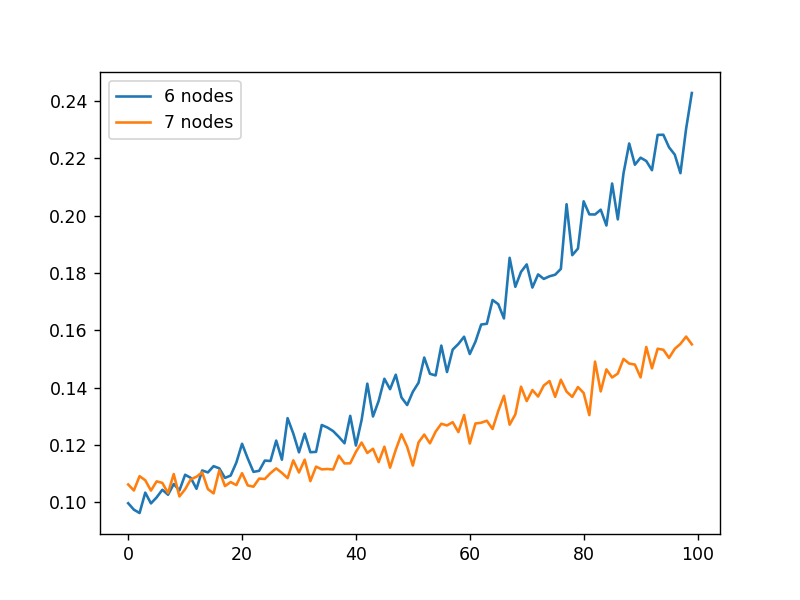

In [85]:
%matplotlib notebook
plt.plot([0.09966, 0.09741000000000001, 0.09625, 0.10336000000000001, 0.0996, 0.1017, 0.10436, 0.10262, 0.10637, 0.10411, 0.10959, 0.1085, 0.10468999999999999, 0.11109999999999999, 0.11041, 0.11259999999999999, 0.11183000000000001, 0.1085, 0.10932, 0.11384999999999999, 0.12041000000000002, 0.11528999999999999, 0.11061000000000001, 0.11096, 0.11453999999999999, 0.1144, 0.12151, 0.11485, 0.12934000000000004, 0.12398, 0.11743, 0.12393000000000001, 0.11746000000000001, 0.11757999999999999, 0.12695, 0.12607, 0.12483000000000001, 0.12281, 0.12057999999999999, 0.13013999999999998, 0.1198, 0.12871000000000002, 0.14138, 0.12993000000000002, 0.13539, 0.14308999999999997, 0.13945, 0.14451, 0.13658, 0.13392, 0.13855, 0.14171, 0.15049, 0.14483, 0.14425, 0.15466, 0.14543999999999999, 0.15328, 0.15524000000000002, 0.15775999999999998, 0.15172000000000002, 0.15605000000000002, 0.16201, 0.16228, 0.17057, 0.16912, 0.16415000000000002, 0.18529, 0.17518, 0.18037999999999998, 0.18299, 0.17491, 0.1795, 0.17793, 0.17884, 0.1794, 0.18143, 0.20399, 0.18621000000000001, 0.18852, 0.205, 0.20045000000000002, 0.20041, 0.20208, 0.19657, 0.21121, 0.1987, 0.21475, 0.22518000000000002, 0.21777, 0.22022999999999998, 0.21907, 0.21586000000000002, 0.22818, 0.22823000000000002, 0.22384000000000004, 0.22131, 0.21483, 0.23035, 0.24280000000000002], label="6 nodes")
plt.plot([0.10618999999999999, 0.10411, 0.10909999999999999, 0.10767000000000002, 0.10408, 0.10729000000000001, 0.10675, 0.10321999999999999, 0.10984000000000001, 0.10203, 0.10454, 0.108, 0.10890000000000001, 0.11043, 0.10459, 0.10309, 0.11112000000000001, 0.10565000000000001, 0.10704, 0.10599000000000001, 0.11015000000000001, 0.10587, 0.10543000000000001, 0.10825, 0.10812999999999999, 0.11017, 0.11181999999999999, 0.11025, 0.10842, 0.11462, 0.11037999999999999, 0.11486000000000002, 0.10737000000000001, 0.11243, 0.11148, 0.11160000000000002, 0.11143, 0.11625999999999999, 0.11354, 0.11359999999999999, 0.11758000000000002, 0.12082999999999999, 0.11719999999999998, 0.11866, 0.11400999999999999, 0.11939, 0.11206999999999999, 0.11832, 0.12373, 0.11935000000000003, 0.1128, 0.12089, 0.12361, 0.12056, 0.12462999999999999, 0.12739, 0.12680000000000002, 0.12794, 0.12448, 0.13044999999999998, 0.12051000000000002, 0.12749000000000002, 0.12775, 0.12844, 0.12556, 0.13184, 0.13713999999999998, 0.12706, 0.13064, 0.14032, 0.13531, 0.13914999999999997, 0.13688999999999998, 0.14074, 0.14229, 0.13679000000000002, 0.14275, 0.13861, 0.13676, 0.14019, 0.13813, 0.1304, 0.14908000000000002, 0.13868, 0.14636000000000002, 0.14353000000000002, 0.14492, 0.15, 0.14839000000000002, 0.14804, 0.14357999999999999, 0.15418, 0.14674, 0.15356999999999998, 0.15321, 0.15036000000000002, 0.15352000000000002, 0.15525, 0.15781, 0.15510000000000002], label="7 nodes")
plt.legend(loc=0)